1. **Carregar a Imagem:** Utilizei OpenCV para carregar a imagem com as moedas.

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem

image = cv2.imread('img-moedas.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

2. **Processamento de Imagem:**
    - Converter a imagem para escala de cinza
    - Apliquei técnicas de suavização como GaussianBlur para reduzir ruídos.

In [26]:
gray_blurred = cv2.GaussianBlur(gray, (15, 15), 0) # Ajustar os valores se necessário

3. **Detectar círculos com a Transformada de Hough:**
- Usando a função `HoughCircles` para localizar os círculos (moedas).

In [27]:
# Detectar círculos com a Transformada de Hough
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,          # Resolução do acumulador
    minDist=50,      # Distância mínima entre os centros dos círculos
    param1=100,      # Parâmetro para o método Canny (bordas)
    param2=30,       # Limite para a detecção de círculos
    minRadius=15,    # Raio mínimo do círculo
    maxRadius=60     # Raio máximo do círculo
)

4. **Desenhar os círculos detectados na imagem:**
    - Isso é para certificar que a detecção foi bem-sucedida antes de desenhar os círculos

In [ ]:
# Desenha apenas um círculo por moeda e prevê o valor com base no raio
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :1]:  # Limita apenas 1 círculo por moeda
        # Exibir o raio detectado para depuração
        print(f"Raio detectado: {r}")
        
        # Desenha o círculo externo
        cv2.circle(image, (x, y), r, (0, 255, 0), 3)
        # Desenha o centro do círculo
        cv2.circle(image, (x, y), 3, (255, 0, 0), -1)
        
        # Prever o valor da moeda com base no raio
        if r >= 40:  
            valor = "R$ 0,10"
        elif 28 <= r < 40:  
            valor = "R$ 0,50"
        elif 22 <= r < 28:  
            valor = "R$ 0,25"
        elif r < 22:  
            valor = "R$ 1,00"
        else:
            valor = "Valor desconhecido"
        
        # Exibir o valor na imagem
        cv2.putText(image, valor, (x - 40, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

Raio detectado: 58


5. **Exibe o resultado:**
    - exibe a imagem com os círculos desenhados, mostrando as moedas detectadas.

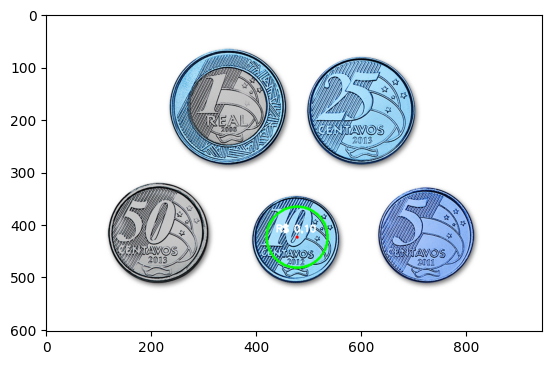

In [29]:
plt.imshow(image)
plt.show()